In [42]:
''' Dataset d'entrainement'''

" Dataset d'entrainement"

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
data = pd.read_csv('C:\\Users\\corre\\Desktop\\Wild Code School\\Projet 3\\GitHub\\semiology_AI-1\\diabete_folder\\Entrainement\\diabetes_base_test.csv')

In [45]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
''' graphique de distribution pour chaque colonne'''

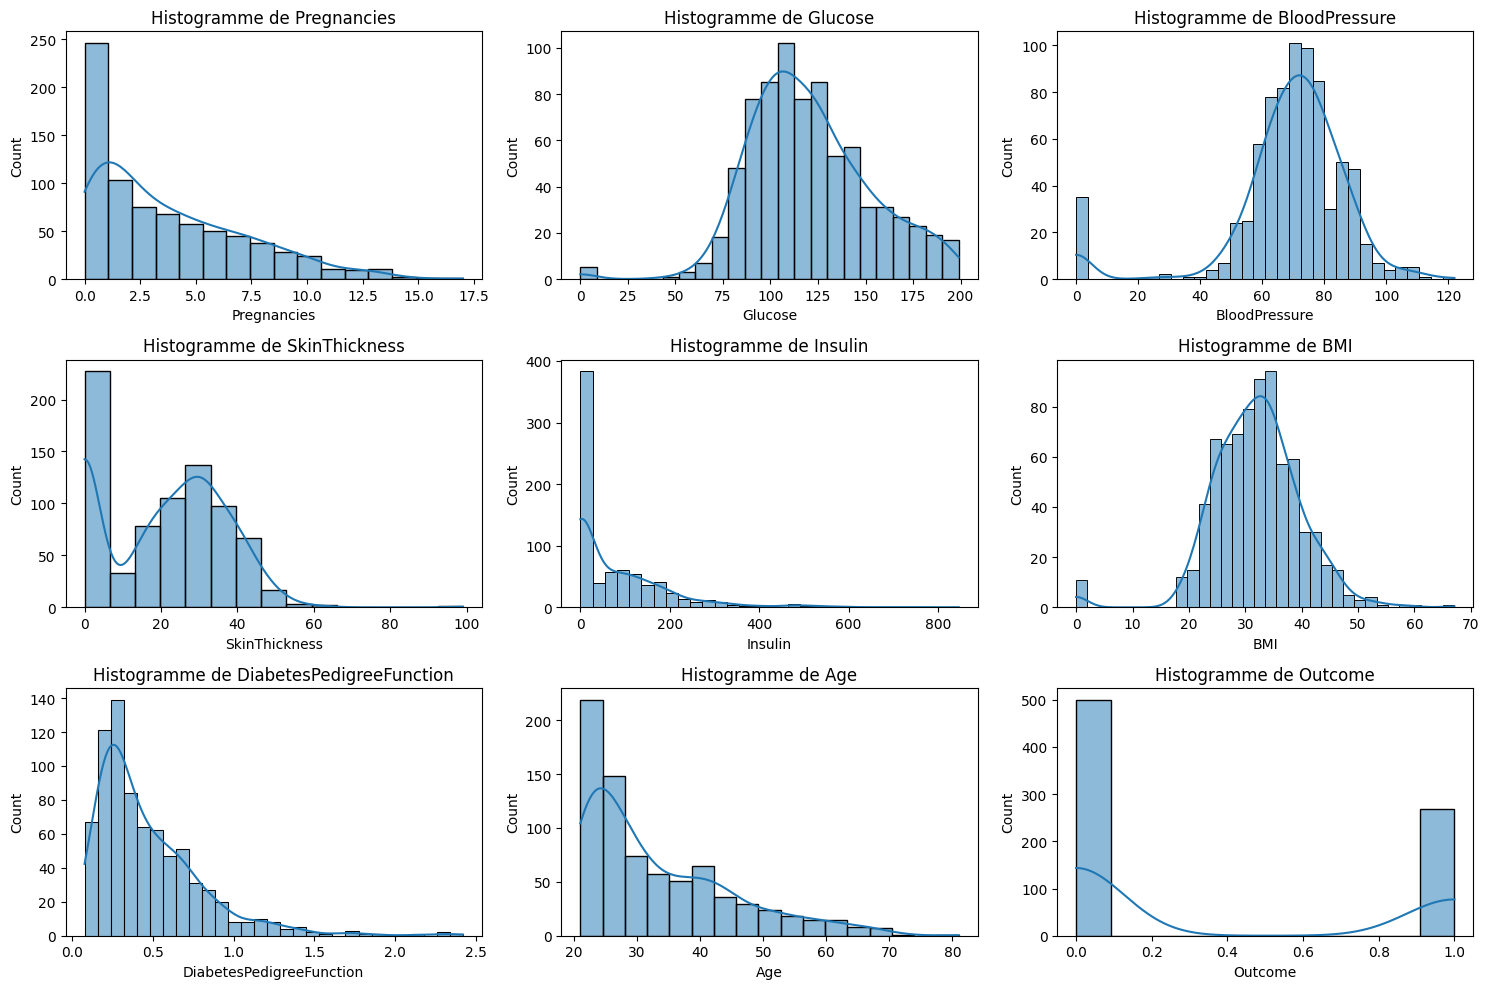

In [50]:
# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque colonne et tracer l'histogramme correspondant
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogramme de {col}')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [ ]:
''' Je refais les graphiques en mettant en evidence les differences de résultat entre
    les patients apparetenant à la classe 1 ou 0 de Outcome
'''

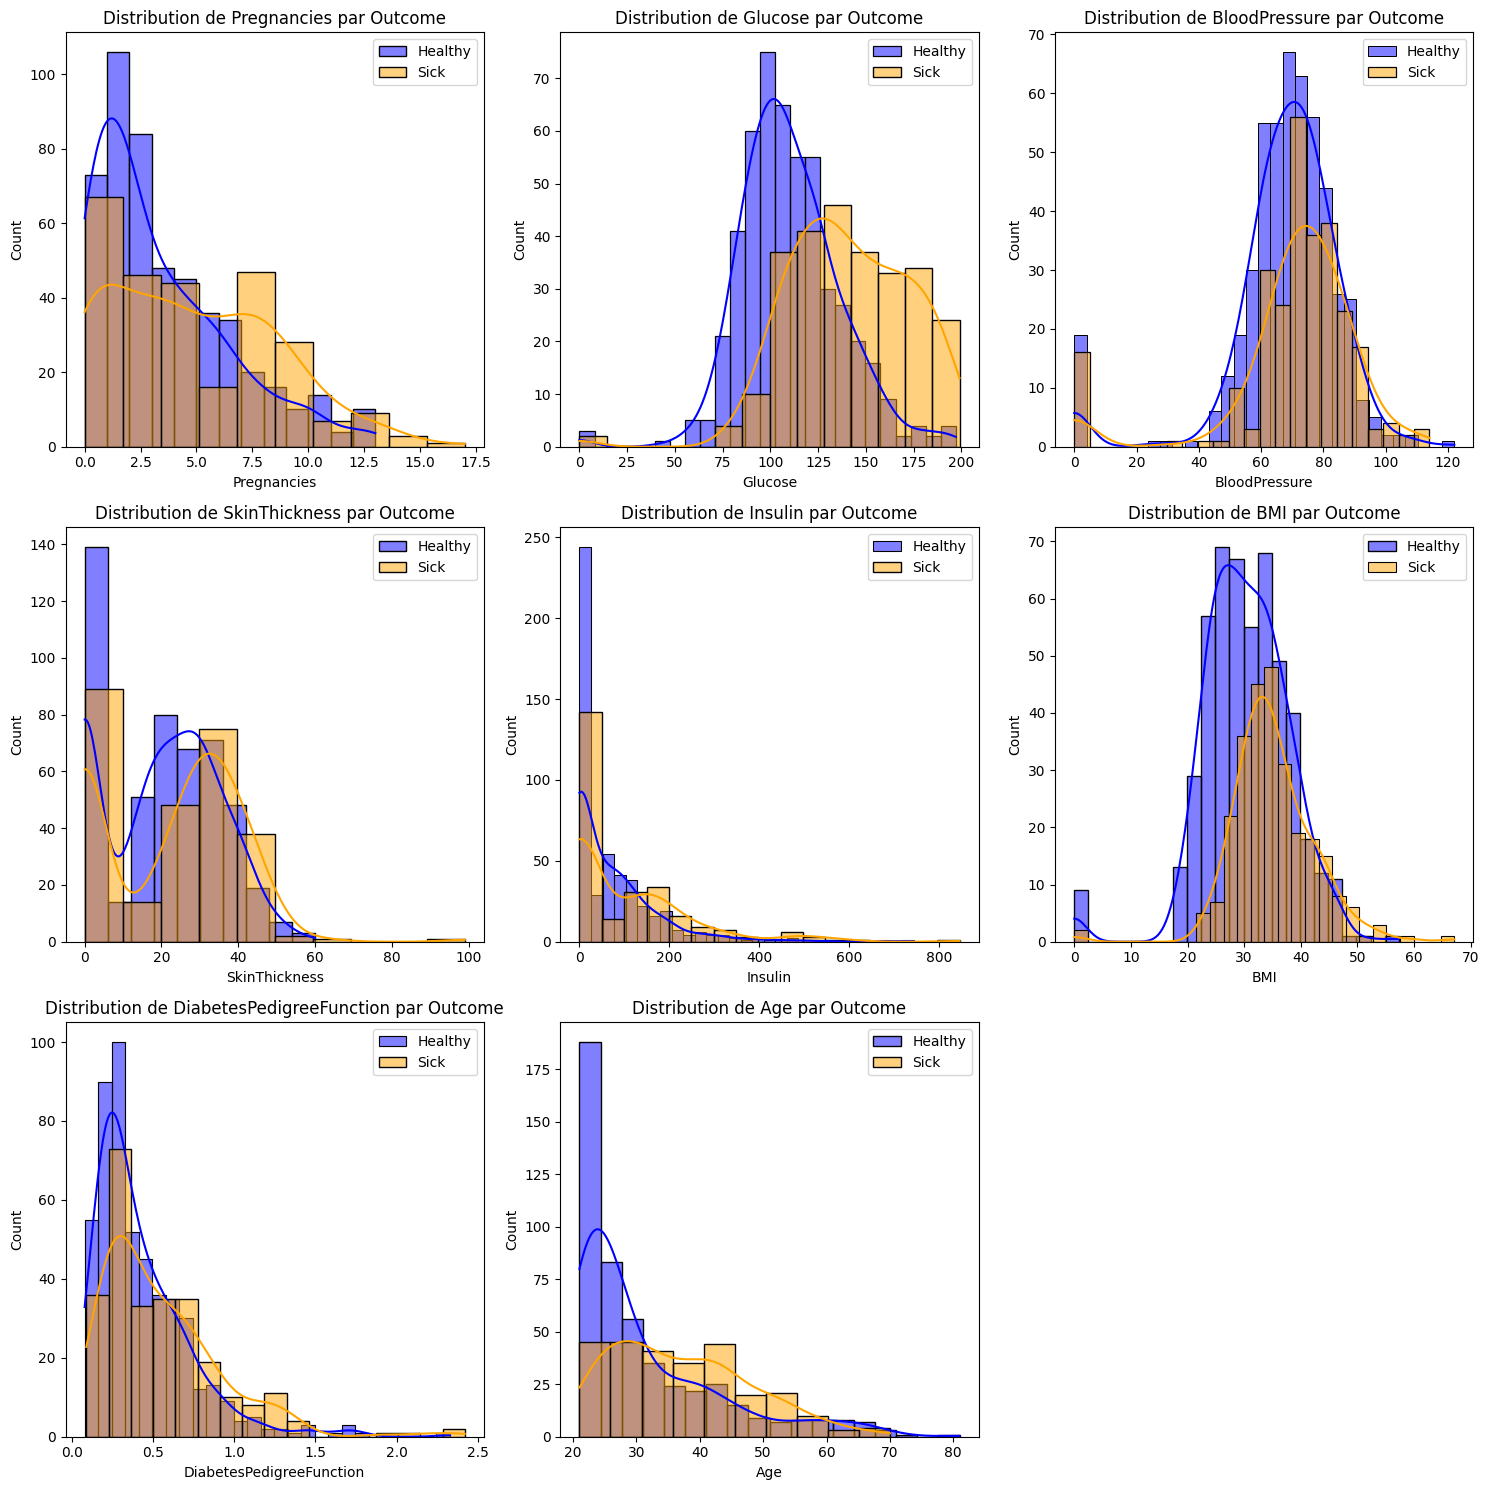

In [52]:

# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les distributions
for i, feature in enumerate(features):
    sns.histplot(data[data['Outcome'] == 0][feature], color='blue', kde=True, ax=axs[i], label='Healthy')
    sns.histplot(data[data['Outcome'] == 1][feature], color='orange', kde=True, ax=axs[i], label='Sick')
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [ ]:
''' Ces graphiques sont particulierement interressant car ils permettent de voir la
    difference de valeurs et de distribution en fonction de Outcome
    On peut en deduire differentes choses :
        Les femmes ayant été le plus de fois enceintes sont plus sujette au diabete.
        Les personnes agés sont peu representés, elles decedent donc plus precocement que les personnes saines.
        Plus le nombre de personne diabetiques est important dans la famille, plus on a de risques d'avoir également le diabète
        c'est une maladie génétique.
        Beaucoup plus de personne souffrenr du diabete ou elles ne secretent pas d'insuline (diabete type 1 )
        Les personnes en surpoid sont plus sujettes au diabète.
        Les personnes malades sont generalements en surdose de glucose.
        
'''

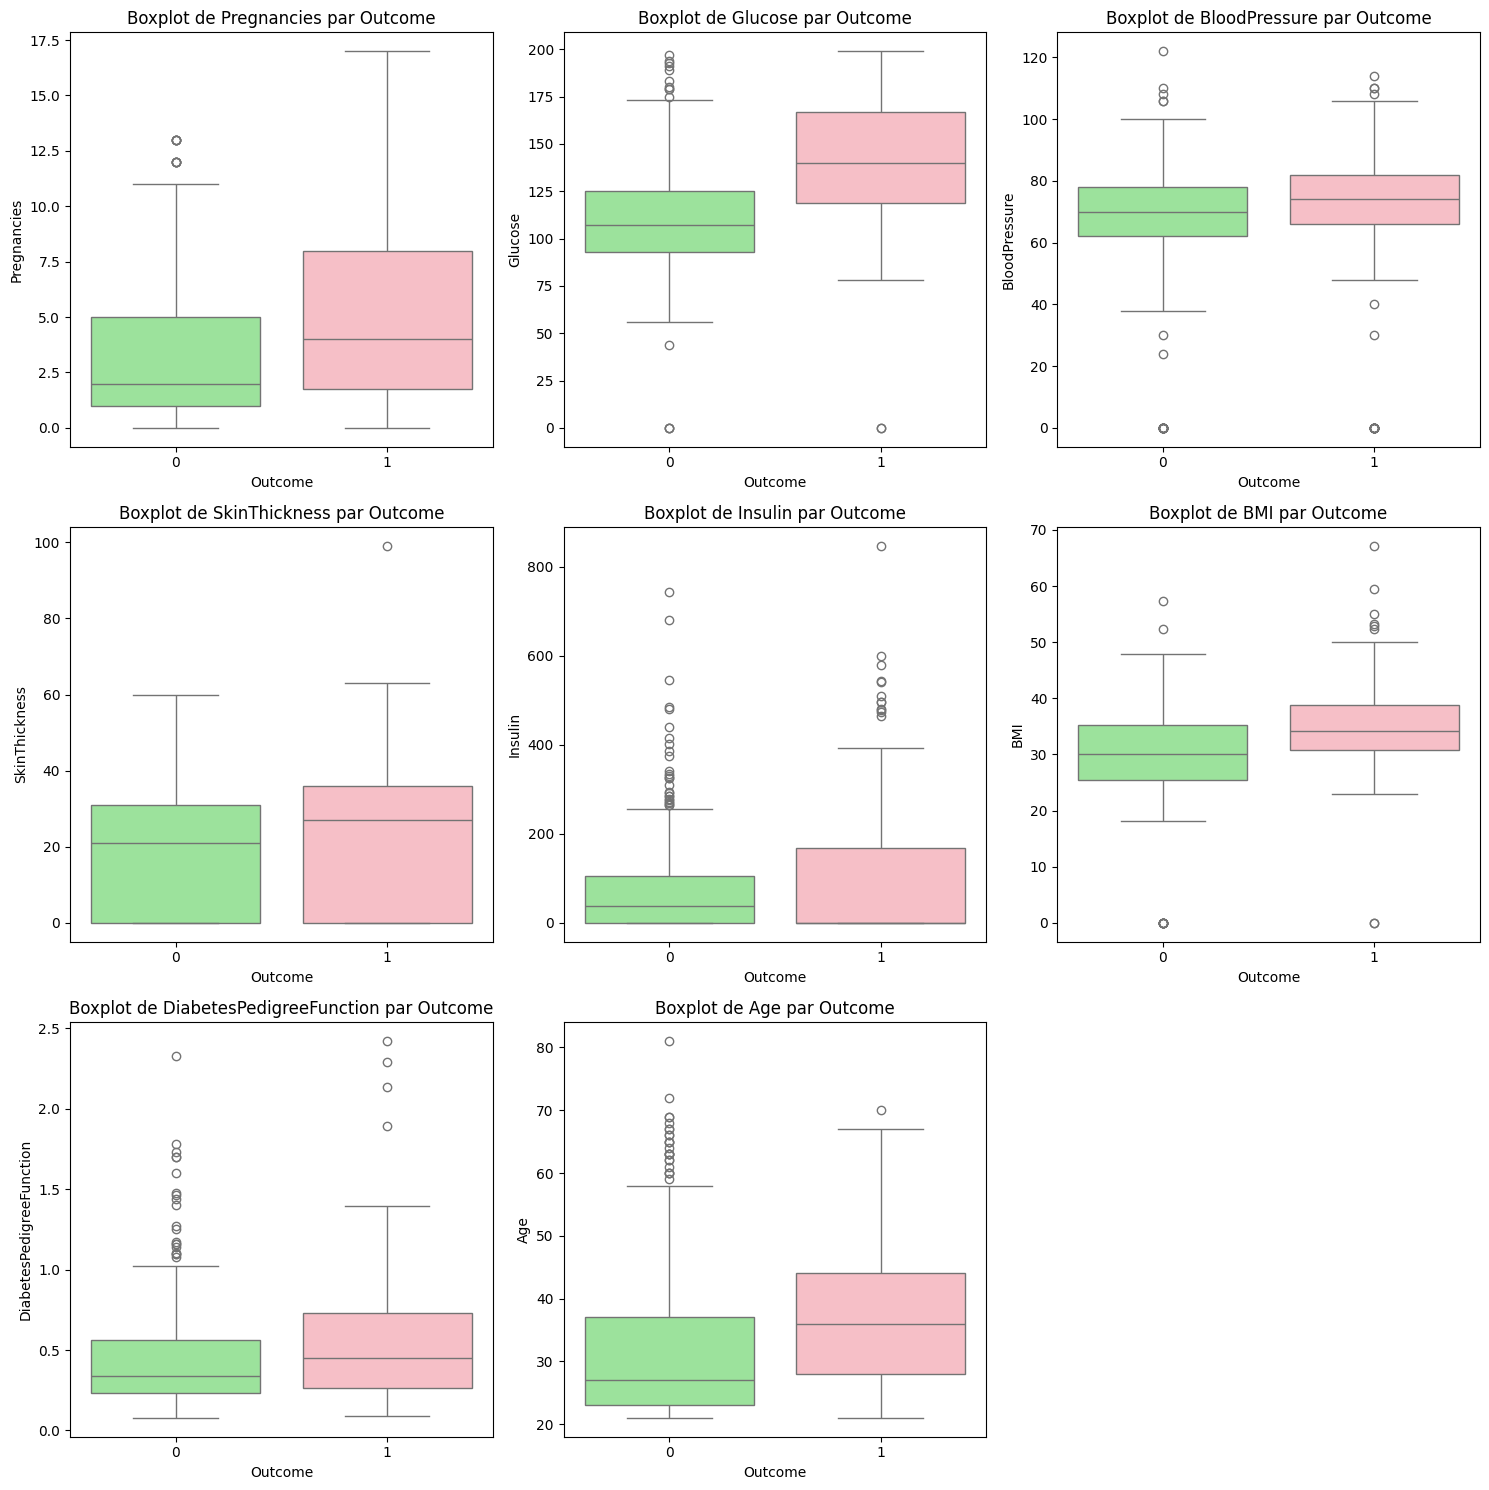

In [68]:
# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les boîtes à moustaches
for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=data, hue='Outcome', palette=['lightgreen', 'lightpink'], ax=axs[i], legend=False)
    axs[i].set_title(f'Boxplot de {feature} par Outcome')

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()


In [ ]:
''' Les boxplots nous permettent de voir que des valeurs sortent de l'ordinaires dans certaines lignes
    Nous allons devoir explorer ces données afin de determiner si elles sont due à la maladie ou si 
    elles sont des valeurs abérrantes à modifier ou supprimer'''

In [ ]:
''' Pairplot du data set selon Outcome
    On cherche les relations entre les variables
'''

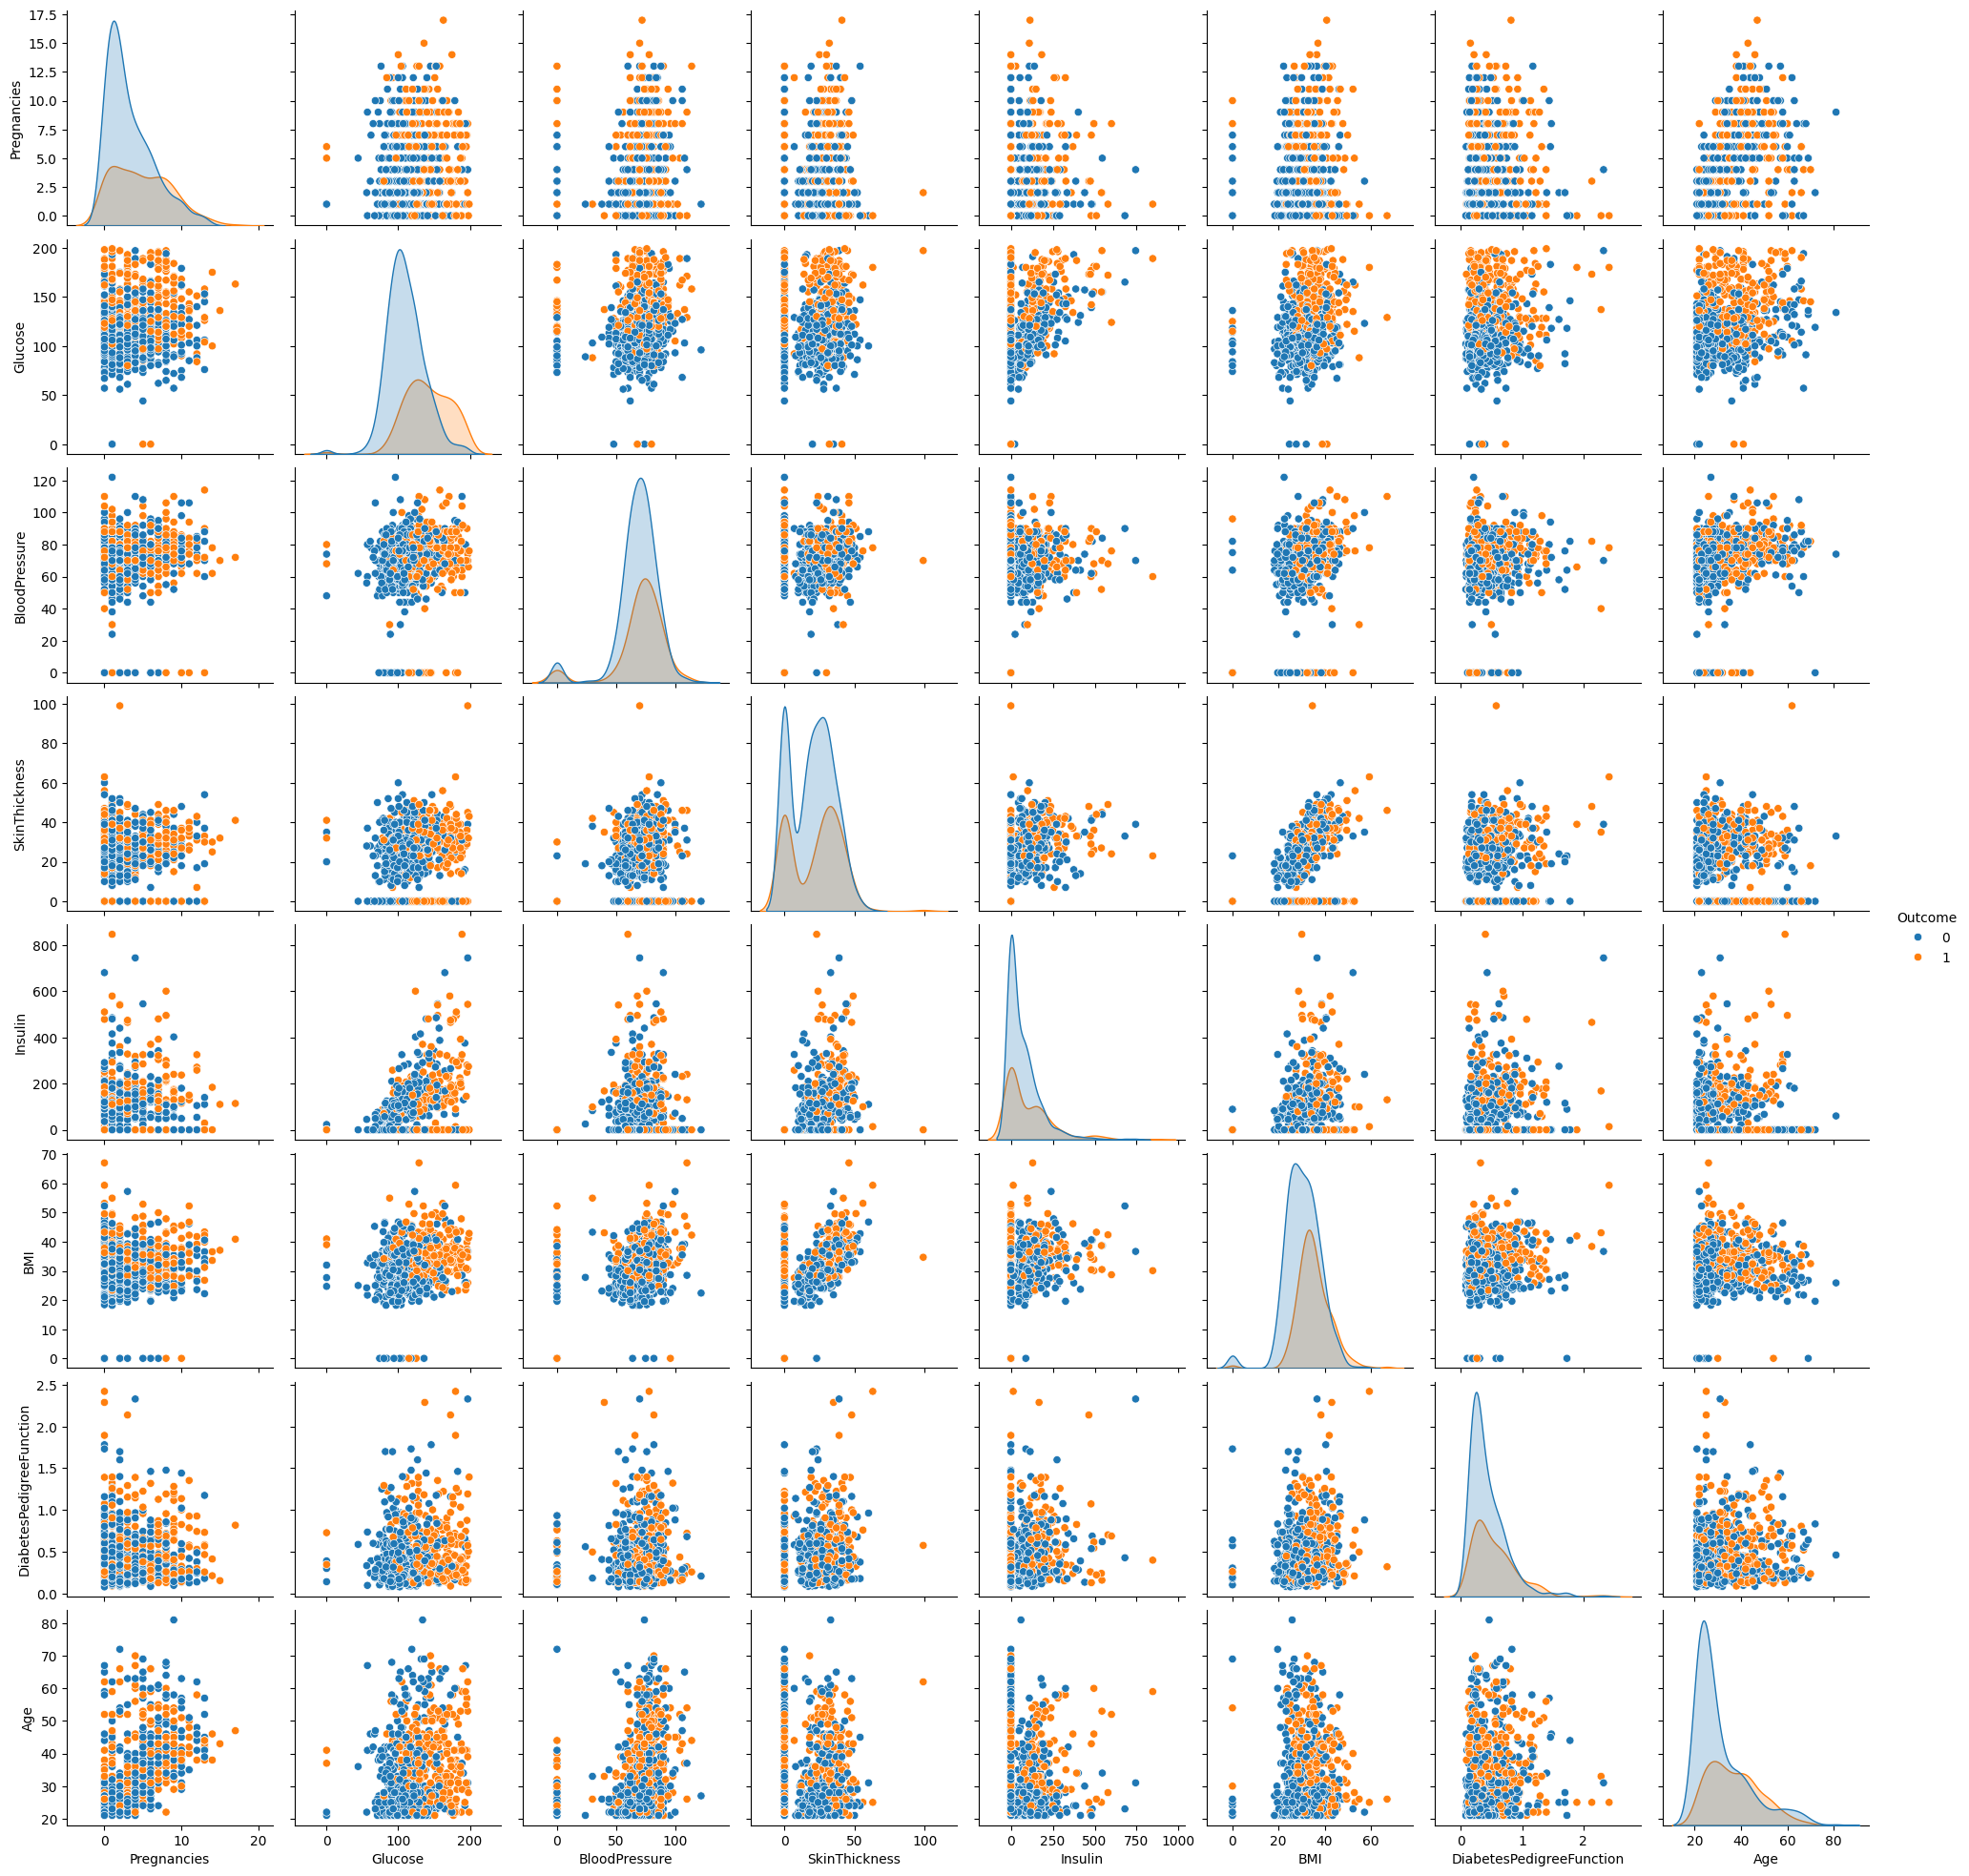

In [69]:
sns.pairplot(data,hue="Outcome")
plt.show()

In [ ]:
''' Matrice de corrélation '''

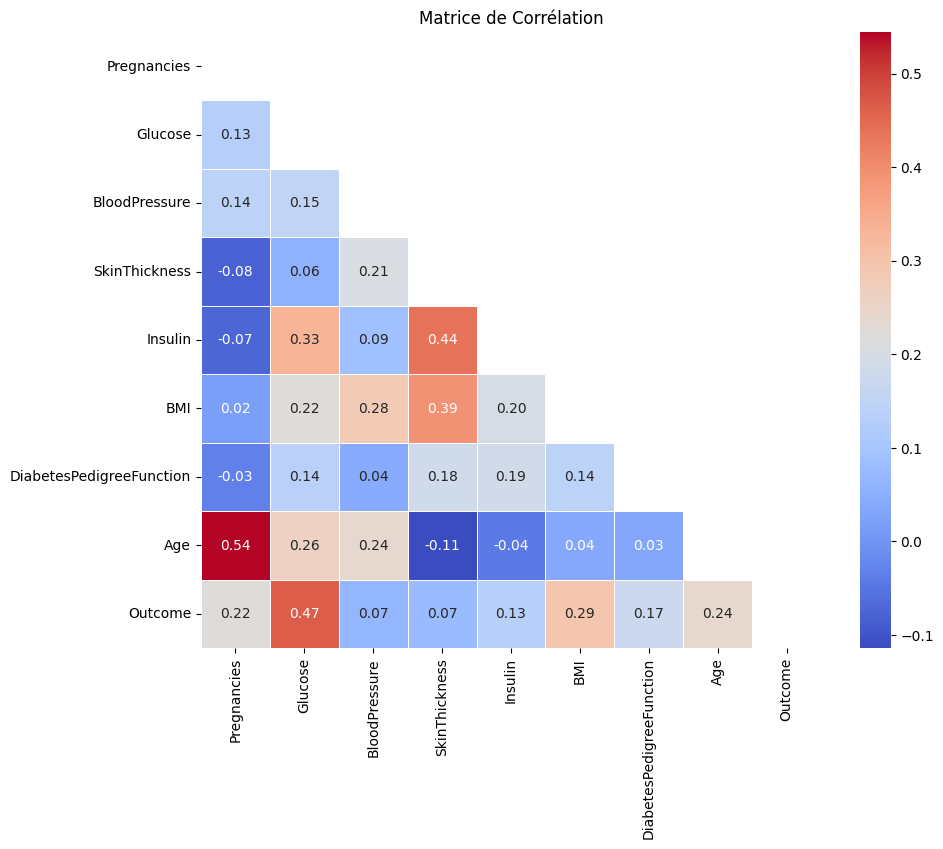

In [57]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Matrice de Corrélation')
plt.show()

In [58]:
''' 
    La corrélation entre l'age & le nombre de grossesse est logique.
    Tout comme celle du glucose dans le nombre de personnes atteinte de diabete.
    Il serait bon de refaire cette matrice de corrélation avec uniquement les personnes malades
    La correlation entre l'epaisseur de la peau & l'IMC peut etre logique, mais elle est a approfondir 
    avec SkinThickness qui a l'air d'etre également corrolé a ces resultats.

    Les correlations sont cependant ici relativement faibles. C'est pourquoi il est important de les additionner
    pour avoir un modele precis.
'''

" \n    La corrélation entre l'age & le nombre de grossesse est logique.\n    Tout comme celle du glucose dans le nombre de personnes atteinte de diabete.\n    Il serait bon de refaire cette matrice de corrélation avec uniquement les personnes malades\n    La correlation entre l'epaisseur de la peau & l'IMC peut etre logique, mais elle est a approfondir \n    avec SkinThickness qui a l'air d'etre également corrolé a ces resultats.\n\n    Les correlations sont cependant ici relativement faibles. C'est pourquoi il est important de les additionner\n    pour avoir un modele precis.\n"

In [59]:
# Exploration de Outcome

data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [60]:
''' 0 serait le nombre de patient non atteints.
    1 celui de personnes malades
    Nous allons diviser le dataSet en deux, et ainsi l'explorer '''

" 0 serait le nombre de patient non atteints.\n    1 celui de personnes malades\n    Nous allons diviser le dataSet en deux, et ainsi l'explorer "

In [61]:
data_sick = data[data['Outcome'] == 1]
data_healthy = data[data['Outcome'] == 0]

In [62]:
''' On commence par explorer data_sick
    Methode identique que pour le dataSet entier
'''

' On commence par explorer data_sick\n    Methode identique que pour le dataSet entier\n'

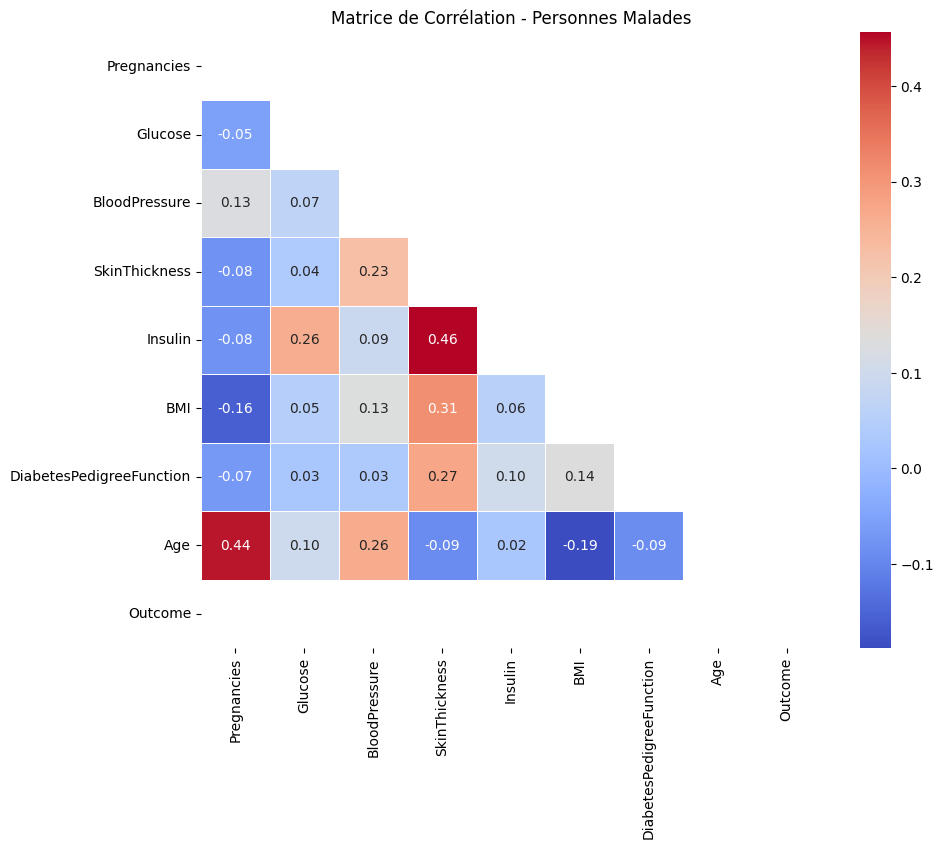

In [63]:
# Matrice de corrélation
correlation_matrix_sick = data_sick.corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sick, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Matrice de Corrélation - Personnes Malades')
plt.show()

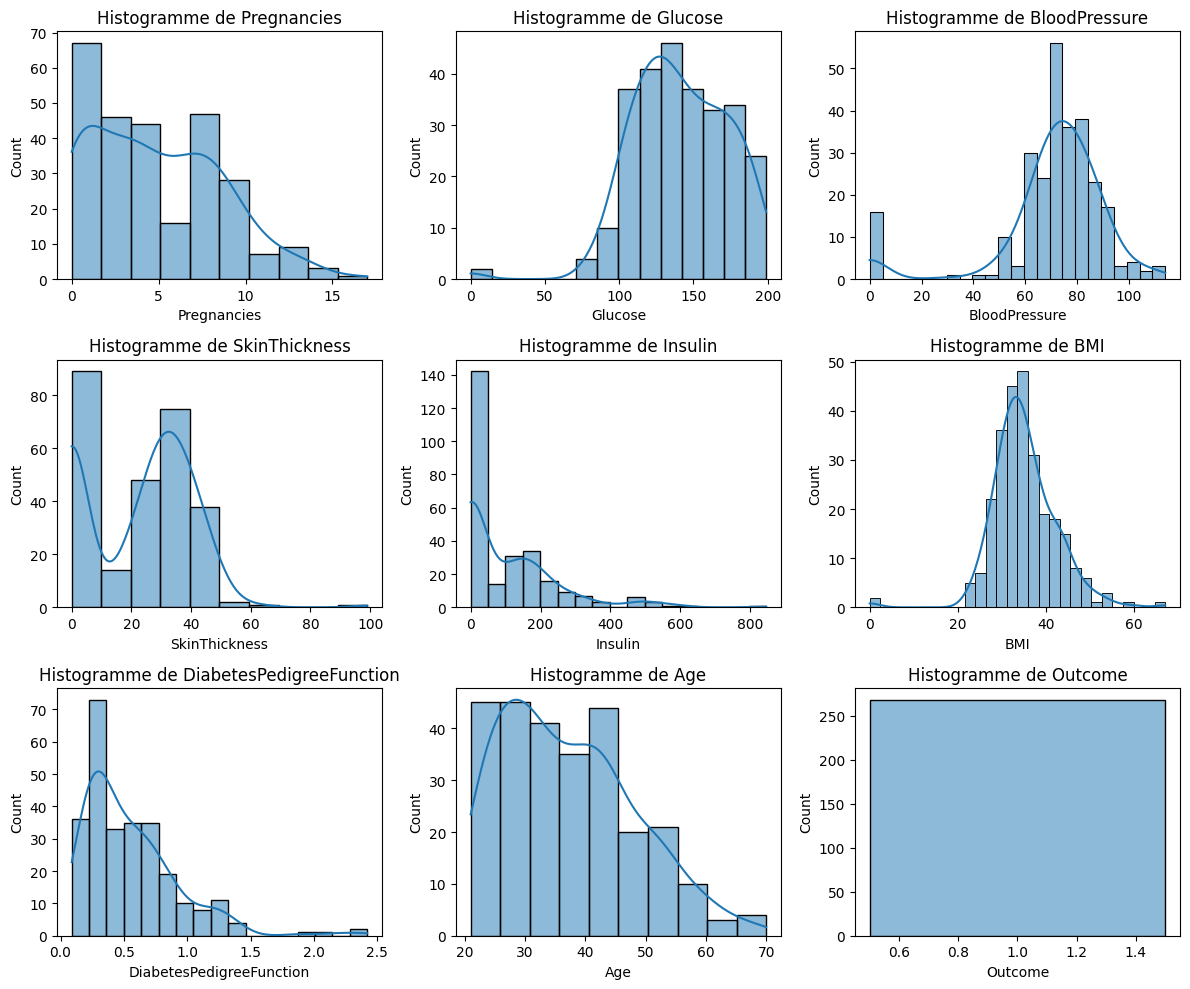

In [64]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(data_sick.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data_sick[col], kde=True)
    plt.title(f'Histogramme de {col}')
plt.tight_layout()
plt.show()

In [65]:
''' Maintenant le dataSet de personne saines
'''

' Maintenant le dataSet de personne saines\n'

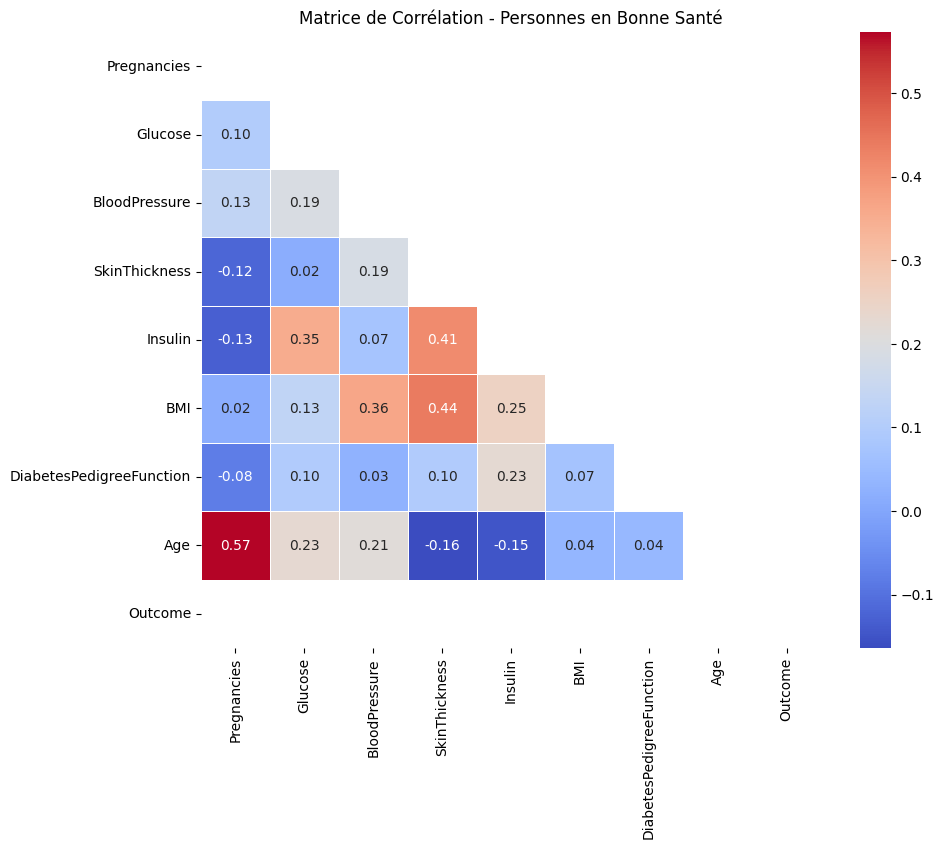

In [66]:
# Matrice de corrélation
correlation_matrix_healthy = data_healthy.corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_healthy, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Matrice de Corrélation - Personnes en Bonne Santé')
plt.show()


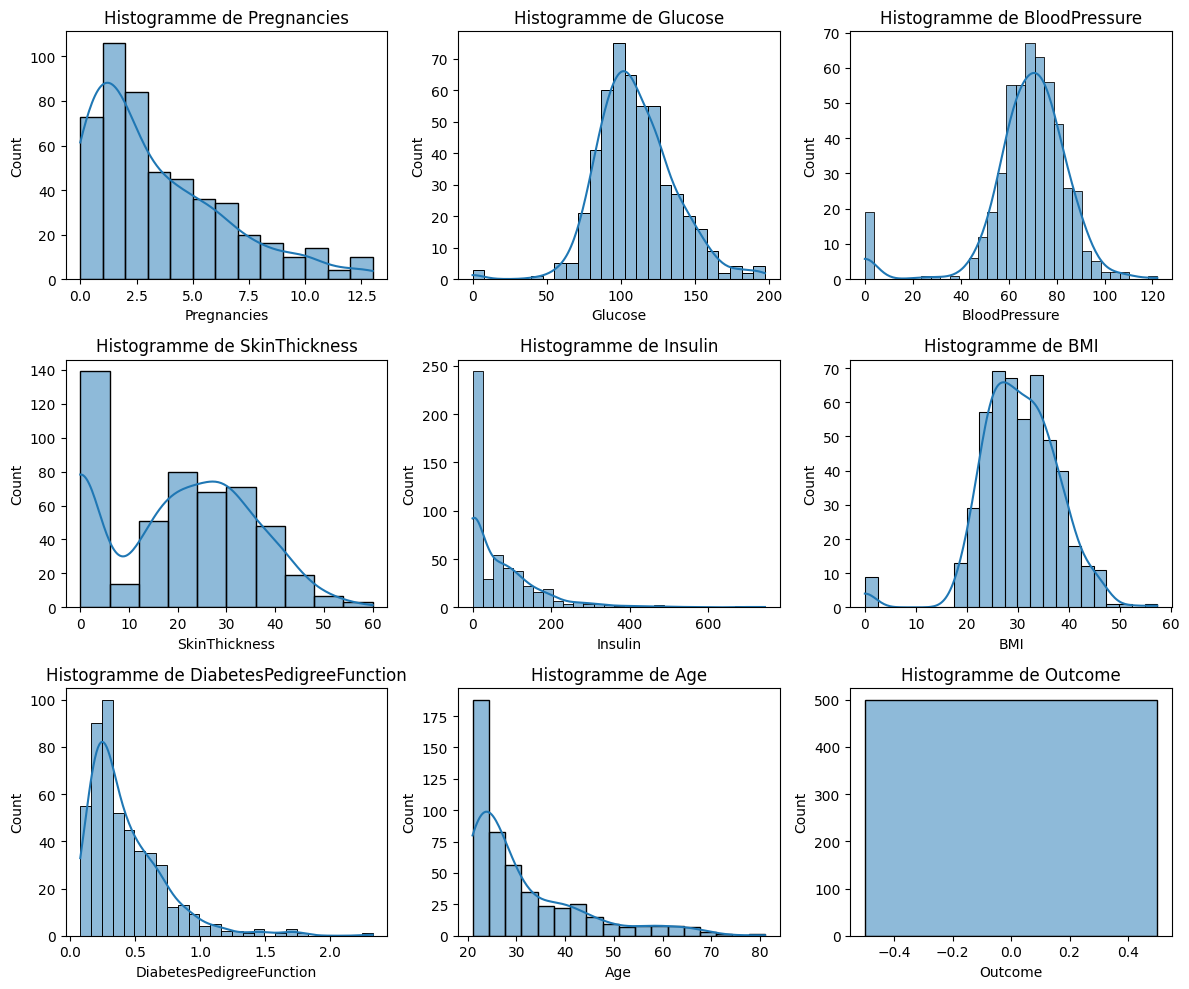

In [67]:
# Histogrammes
plt.figure(figsize=(12, 10))
for i, col in enumerate(data_healthy.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data_healthy[col], kde=True)
    plt.title(f'Histogramme de {col}')
plt.tight_layout()
plt.show()
